## INTRODUCTION TO DATA  SCIENCE (DS111)

# Study loan data

Name - ID

Name - ID

Name - ID

Name - ID

Name - ID

## Brief	description	and	goal	of	analysis

### description	

This data describes data related to making decisions in approving loan applications

### goal	of	analysis

- Exploratory Data Analysis and know how this data are related
- Find the best machine learning model

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import train & test split to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Import classifiers/models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Import model evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sns.set_theme()

## Proper	Loading	of	the	dataset (Correctly	importing)

In [348]:
df=pd.read_csv("loan_data_1.csv")

## Dataset	description(Print	all	the	data)

In [335]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y


In [336]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [337]:
df.tail()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,376,LP002953,Male,Yes,3+,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,377,LP002974,Male,Yes,0,Graduate,No,3232.0,NaN,108.0,360.0,1.0,Rural,Y
378,378,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,379,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
380,380,LP002990,Female,No,0,NaN,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [352]:
df=df.drop(labels='Property_Area',axis=1)

In [353]:
df=df.drop(labels='Loan_ID',axis=1)

In [354]:
df=df.drop(labels='Unnamed: 0',axis=1)

In [355]:
df=df.drop(labels='Dependents',axis=1)

 ## Basic	summary	statistics(Describe- shape)

In [236]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,369.000000,363.000000,373.000000,370.000000,351.000000
mean,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [237]:
df.shape

(381, 10)

## Exploratory	Data	Analysis	(EDA)

### 1D

(array([  5.,  34., 104., 116.,  59.,  24.,  14.,   9.,   1.,   3.]),
 array([ 150. , 1105.3, 2060.6, 3015.9, 3971.2, 4926.5, 5881.8, 6837.1,
        7792.4, 8747.7, 9703. ]),
 <BarContainer object of 10 artists>)

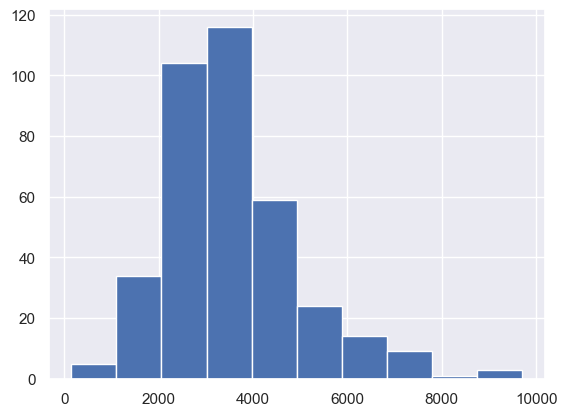

In [343]:
plt.hist(df['ApplicantIncome'])
# Many of the people who applied for loans had an income between 2,000 and 5,000

### Many of the people who applied for loans had an income between 2,000 and 4,000

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  1.,  2.,  0.,  2.,  1.,  1.,  4.,
         3.,  4.,  2.,  5.,  2.,  6.,  2.,  7., 12.,  2.,  7.,  1., 11.,
         5.,  2., 11.,  3., 21., 10., 18., 10.,  9., 21., 24., 16.,  4.,
        21., 13., 13., 23., 16., 11., 14.,  9.,  9.,  2.,  9.]),
 array([  9.  ,  11.82,  14.64,  17.46,  20.28,  23.1 ,  25.92,  28.74,
         31.56,  34.38,  37.2 ,  40.02,  42.84,  45.66,  48.48,  51.3 ,
         54.12,  56.94,  59.76,  62.58,  65.4 ,  68.22,  71.04,  73.86,
         76.68,  79.5 ,  82.32,  85.14,  87.96,  90.78,  93.6 ,  96.42,
         99.24, 102.06, 104.88, 107.7 , 110.52, 113.34, 116.16, 118.98,
        121.8 , 124.62, 127.44, 130.26, 133.08, 135.9 , 138.72, 141.54,
        144.36, 147.18, 150.  ]),
 <BarContainer object of 50 artists>)

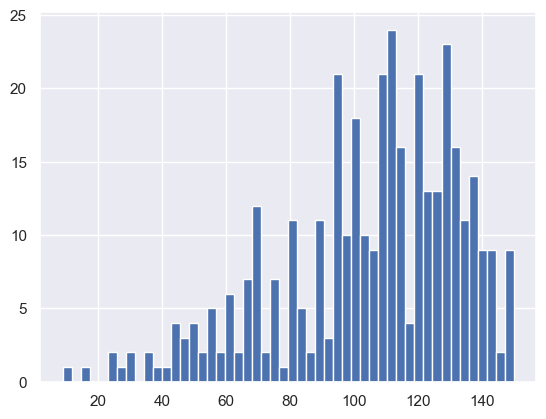

In [239]:
plt.hist(df['LoanAmount'], bins=50)
# Loan Amount between 100k and 140k

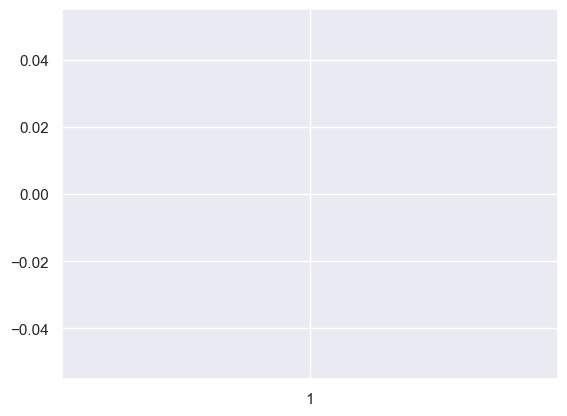

In [240]:
plt.boxplot(df[['ApplicantIncome']])
plt.show()


### D2

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

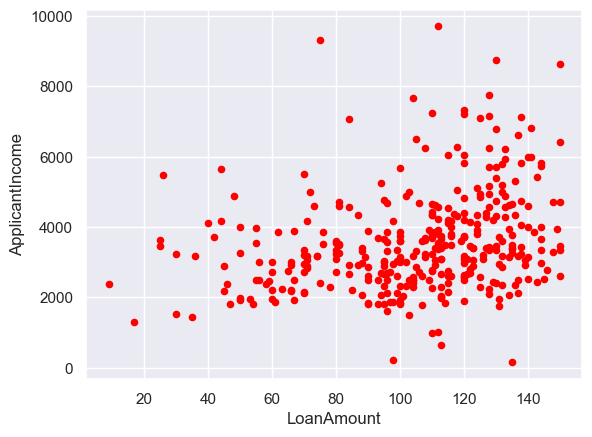

In [241]:
#Scatter Plot
df.plot.scatter(x='LoanAmount', y='ApplicantIncome', c='red')
#Most applicants whose income ranges from 2000 to 4000 try to obtain loans between 100,000 and 140,000.
#The higher the income, the lower the demand for loans.
### We note that the figure shows us the outliers values of the data

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

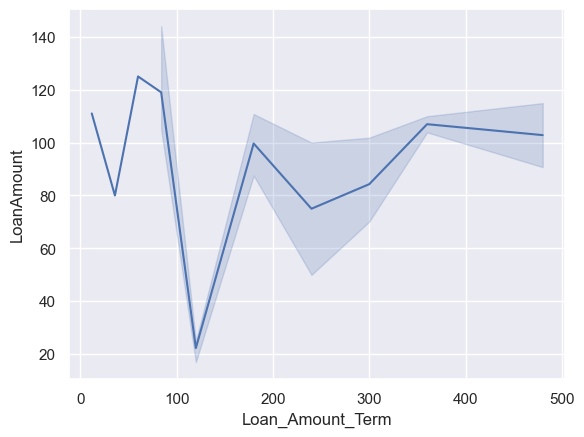

In [242]:
sns.lineplot(data=df, x='Loan_Amount_Term', y='LoanAmount')

### D3

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

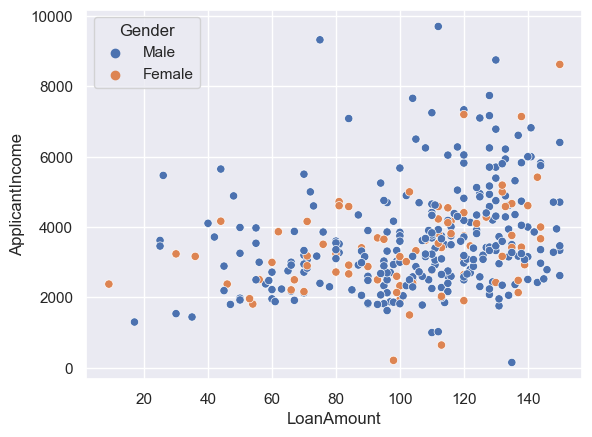

In [243]:
sns.scatterplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Gender')


<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

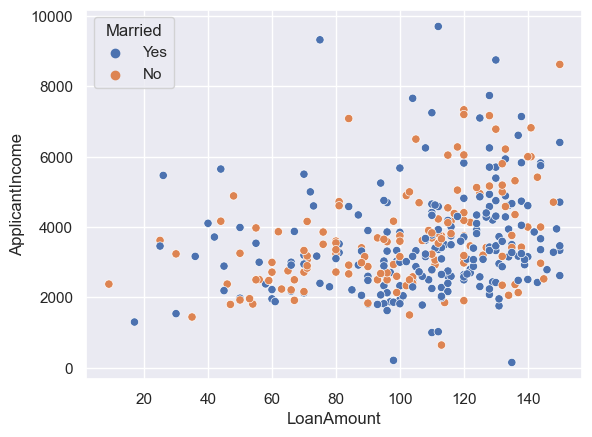

In [244]:
sns.scatterplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Married')


<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

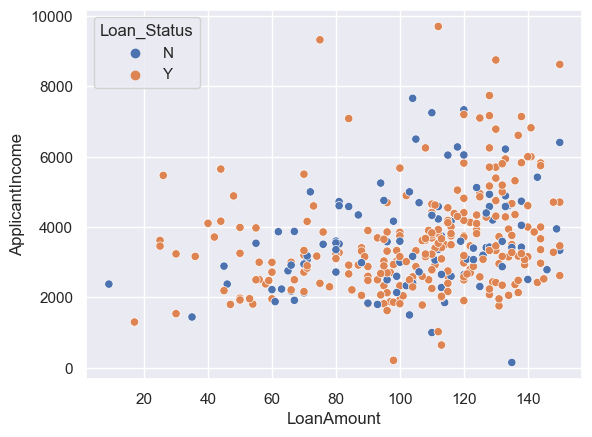

In [245]:
sns.scatterplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')


In [356]:
dfc=df.copy()
dfc=dfc.drop(labels='Gender',axis=1)
dfc=dfc.drop(labels='Married',axis=1)
dfc=dfc.drop(labels='Education',axis=1)
dfc=dfc.drop(labels='Self_Employed',axis=1)
dfc=dfc.drop(labels='Loan_Status',axis=1)

In [318]:
#dfc['Gender'] = np.where(dfc['Gender'] == 'Male', 1, 0)
#dfc['Married'] = np.where(dfc['Married'] == 'Yes', 1, 0)
#dfc['Education'] = np.where(dfc['Education'] == 'Graduate', 1, 0)
#dfc['Self_Employed'] = np.where(dfc['Self_Employed'] == 'Yes', 1, 0)
#dfc['Loan_Status'] = np.where(dfc['Loan_Status'] == 'Y', 1, 0)

In [357]:
dfc.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.241937,0.272040,-0.114728,0.021377
CoapplicantIncome,-0.241937,1.000000,0.103402,-0.002225,0.035889
LoanAmount,0.272040,0.103402,1.000000,0.123746,-0.040678
Loan_Amount_Term,-0.114728,-0.002225,0.123746,1.000000,-0.013452
Credit_History,0.021377,0.035889,-0.040678,-0.013452,1.000000


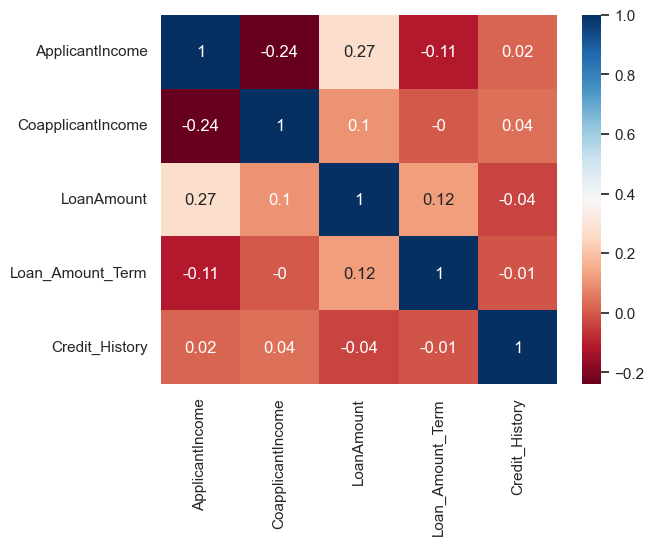

In [359]:
corrHeatMap = dfc.corr().round(2)
sns.heatmap(corrHeatMap, cmap='RdBu', annot=True)
plt.show()

C:\Users\amalw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


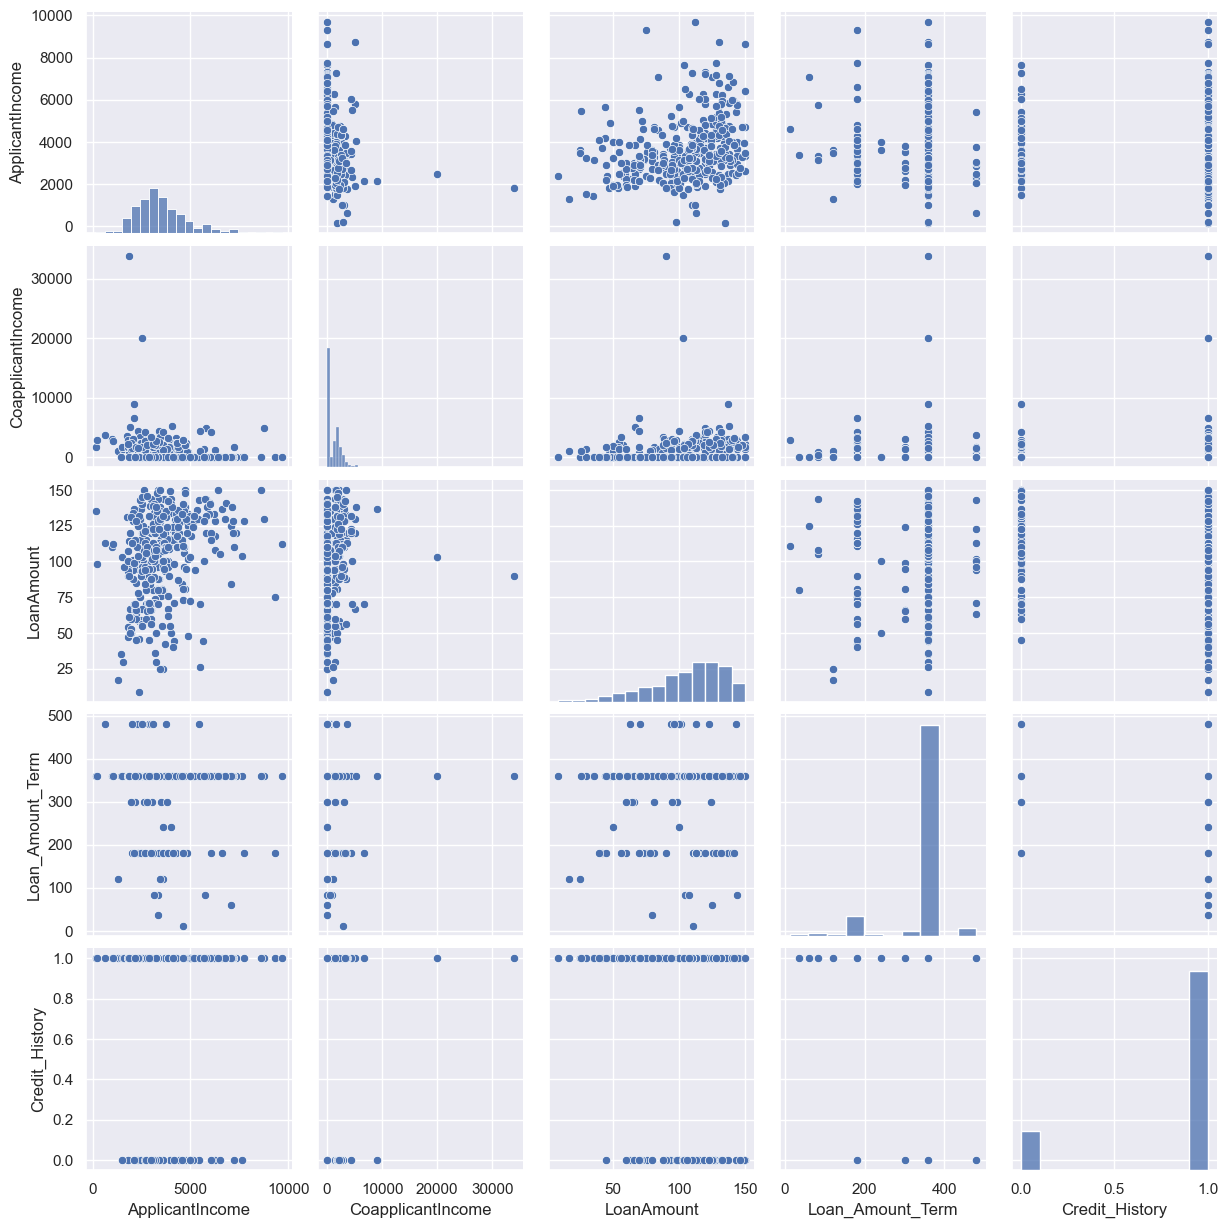

In [360]:
sns.pairplot(dfc)

## Data	Preprocessing	as	needed 

In [361]:
dfc=df.copy()

In [362]:
print(dfc.isnull().any())

Gender                True
Married              False
Education             True
Self_Employed         True
ApplicantIncome       True
CoapplicantIncome     True
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Loan_Status          False
dtype: bool


In [381]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [366]:
x = df["Gender"].mode()[0]
df["Gender"].fillna(x, inplace = True)

In [368]:
x = df["Education"].mode()[0]
df["Education"].fillna(x, inplace = True)

In [372]:
x = df["Self_Employed"].mode()[0]
df["Self_Employed"].fillna(x, inplace = True)

In [374]:
x = df["ApplicantIncome"].mean()
df["ApplicantIncome"].fillna(x, inplace = True)

In [376]:
x = df["CoapplicantIncome"].mean()
df["CoapplicantIncome"].fillna(x, inplace = True)

In [378]:
x = df["LoanAmount"].mean()
df["LoanAmount"].fillna(x, inplace = True)

In [379]:
x = df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(x, inplace = True)

In [380]:
x = df["Credit_History"].mode()[0]
df["Credit_History"].fillna(x, inplace = True)

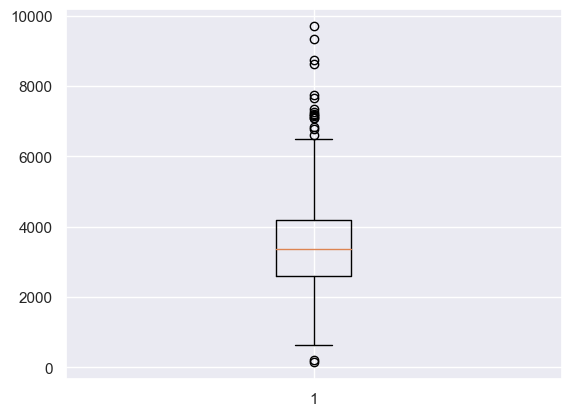

In [382]:
plt.boxplot(df[['ApplicantIncome']])
plt.show()


In [271]:
for x in df.index:
     if df.loc[x, 'ApplicantIncome'] >6250:
            df.loc[x,'ApplicantIncome'] = df['ApplicantIncome'].mean()

In [272]:
for x in df.index:
     if df.loc[x, 'ApplicantIncome'] <1000:
            df.loc[x,'ApplicantIncome'] = df['ApplicantIncome'].mean()


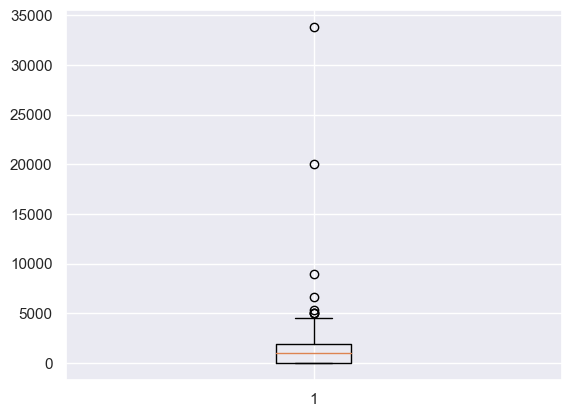

In [273]:
plt.boxplot(df[['CoapplicantIncome']])
plt.show()


In [274]:
for x in df.index:
     if df.loc[x, 'CoapplicantIncome'] >4500:
            df.loc[x,'CoapplicantIncome'] = df['CoapplicantIncome'].mean()

In [275]:
df.drop_duplicates(inplace = True)


 ## Use all	the	machine learning models

In [280]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df['Married'] = np.where(df['Married'] == 'Yes', 1, 0)
df['Education'] = np.where(df['Education'] == 'Graduate', 1, 0)
df['Self_Employed'] = np.where(df['Self_Employed'] == 'Yes', 1, 0)
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1, 0)

In [282]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,1,1,0,4583.0,1508.000000,128.0,360.0,1.0,0
1,1,1,1,1,3000.0,0.000000,66.0,360.0,1.0,1
2,1,1,0,0,2583.0,2358.000000,120.0,360.0,1.0,1
3,1,0,1,0,6000.0,0.000000,141.0,360.0,1.0,1
4,1,1,0,0,2333.0,1516.000000,95.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
376,1,1,1,0,5703.0,0.000000,128.0,360.0,1.0,1
377,1,1,1,0,3232.0,1267.005289,108.0,360.0,1.0,1
378,0,0,1,0,2900.0,0.000000,71.0,360.0,1.0,1
379,1,1,1,0,4106.0,0.000000,40.0,180.0,1.0,1


In [284]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Loan_Status', axis=1), 
                                                    df['Loan_Status'], test_size=0.30, 
                                                    random_state=101)

### KNN

In [324]:

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [325]:
knn_pred = knn.predict(X_test)

### Logistic Regression

In [326]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [327]:
# Make predictions for test data
lr_pred = lr.predict(X_test)

### Decision Trees

In [297]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [298]:
dt_pred = dt.predict(X_test)

### Naive Bayes

In [303]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)


GaussianNB()

In [304]:
NB_pred = GNB.predict(X_test)

### Support Vector Machine

In [309]:
SVC = svm.SVC()

#Fitting the model
SVC.fit(X_train, y_train)

SVC()

In [310]:
predSVC = SVC.predict(X_test)

## Results	Evaluation	and	Analysis

### knn

In [383]:
cm = confusion_matrix(y_test,knn_pred)
print(cm)


[[14 20]
 [27 54]]


Confusion matrix


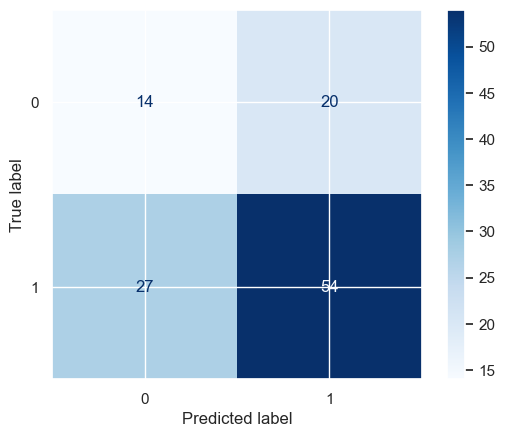

In [384]:
print ('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap='Blues') 
plt.show()



In [385]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 59.13%


In [386]:
cr = classification_report(y_test, knn_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.34      0.41      0.37        34
           1       0.73      0.67      0.70        81

    accuracy                           0.59       115
   macro avg       0.54      0.54      0.54       115
weighted avg       0.61      0.59      0.60       115



### Logistic Regression

[[17 17]
 [ 0 81]]
Confusion matrix


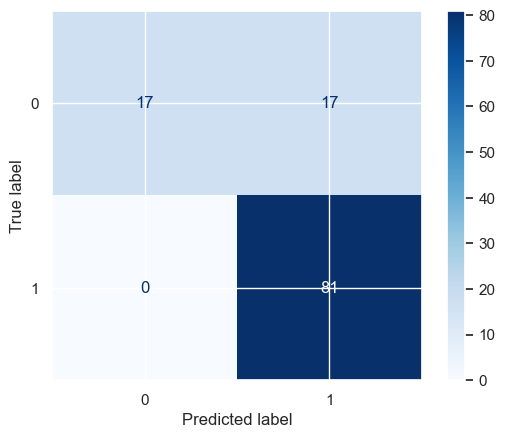

Accuracy: 85.22%
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        34
           1       0.83      1.00      0.91        81

    accuracy                           0.85       115
   macro avg       0.91      0.75      0.79       115
weighted avg       0.88      0.85      0.83       115



In [322]:
cm = confusion_matrix(y_test,lr_pred)
print(cm)
print ('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, cmap='Blues') 
plt.show()
# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cr = classification_report(y_test, lr_pred)
print(cr)

[[23 11]
 [15 66]]
Confusion matrix


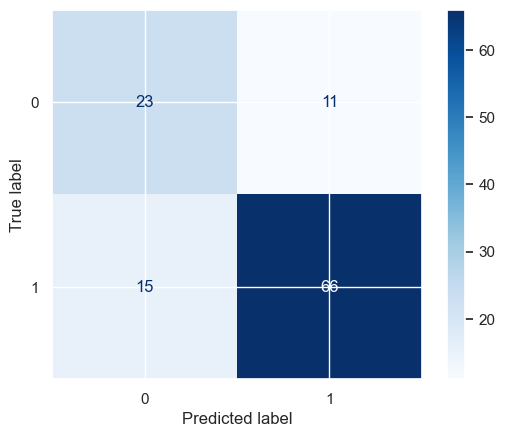

Accuracy: 77.39%
              precision    recall  f1-score   support

           0       0.61      0.68      0.64        34
           1       0.86      0.81      0.84        81

    accuracy                           0.77       115
   macro avg       0.73      0.75      0.74       115
weighted avg       0.78      0.77      0.78       115



In [328]:
cm = confusion_matrix(y_test,dt_pred)
print(cm)
print ('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, cmap='Blues') 
plt.show()
# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cr = classification_report(y_test, dt_pred)
print(cr)

### Naive Bayes

[[18 16]
 [ 0 81]]
Confusion matrix


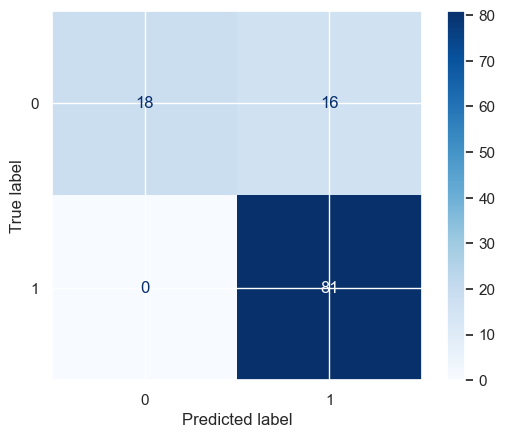

Accuracy: 86.09%
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        34
           1       0.84      1.00      0.91        81

    accuracy                           0.86       115
   macro avg       0.92      0.76      0.80       115
weighted avg       0.88      0.86      0.85       115



In [330]:
NB = confusion_matrix(y_test,NB_pred)
print(NB)
print ('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_test, NB_pred, cmap='Blues') 
plt.show()
# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, NB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cr = classification_report(y_test, NB_pred)
print(cr)

### Support Vector Machine

[[ 0 34]
 [ 0 81]]
Confusion matrix


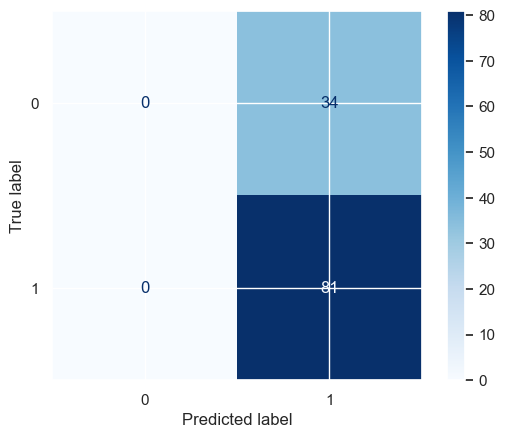

Accuracy: 70.43%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.70      1.00      0.83        81

    accuracy                           0.70       115
   macro avg       0.35      0.50      0.41       115
weighted avg       0.50      0.70      0.58       115



C:\Users\amalw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amalw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amalw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
# Compute confusion matrix
sv = confusion_matrix(y_test,predSVC)
print(sv)
print ('Confusion matrix')
ConfusionMatrixDisplay.from_predictions(y_test, predSVC, cmap='Blues') 
plt.show()
# Evaluate model performance (accuracy)
accuracy = accuracy_score(y_test, predSVC)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cr = classification_report(y_test, predSVC)
print(cr)

# Conclusion

We studied the data by reviewing the description of the data and conducting Exploratory Analysis  Data (EAD), through which we made graphs to review the relationships between the data and the extent of their correlation. Data cleaning was done, processing of missing data and extreme data, and preparing the data to build machine learning models for classification.

Several models demonstrated their ability to classify data after all the procedures we performed. The best classification model based on the confusion matrix and accuracy was the Naive Bayes model with an accuracy of 86%, and the worst results were knn with an accuracy of 56%.